# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
from sklearn.model_selection import GridSearchCV

In [2]:
# run this function if you need to generate a csv data set from scratch
#data_loader.generate_csv_dataset()

In [2]:
X, y, ID = data_loader.load_dataset()

data loaded in 0.1471388339996338ms
          0         1         2         3         4         5         6  \
0  0.303588 -0.523626 -0.651190 -1.467650 -0.572507 -0.280386 -1.388246   
1 -0.484031 -0.262126  0.091142 -1.006777 -0.035807 -0.231770 -0.857022   
2 -0.957440  0.698818 -0.176248 -0.617123 -0.010873  0.925743  0.071460   
3  0.902663 -1.304844 -0.068376 -1.963072 -0.379324 -0.518108 -1.383540   
4  0.506352 -1.478475 -0.688782 -1.687141 -0.489462 -0.443938 -1.347390   

          7         8         9  ...        70        71        72        73  \
0 -0.950745 -2.033666  0.623800  ...  0.116454  1.707008  0.930117  0.145040   
1 -0.493470 -1.053105  0.319601  ...  2.131210  1.565413  0.606471  0.574687   
2 -0.362686 -0.772299  0.671955  ...  0.986818  1.921790  1.916645  2.079151   
3 -0.763318 -2.130993  0.063363  ... -0.442807 -0.534647  0.323451  0.133644   
4 -0.153102 -1.409550  0.290466  ... -0.621059  0.381151  0.202425 -0.084719   

         74        75        76 

In [4]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [3]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with Polynomial kernel

In [53]:
# # Create the parameter grid based on the results of random search 
# params_grid = [{'kernel': ['poly'],
#                 'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 
#                 'degree' : [2, 3, 4], 'C': [1, 10, 100, 1000]}]

# # Train & evaluate cycle
# y_pred = []
# y_true = []

# # for k in tqdm(range(len(X_k_folds.keys()))):
# for k in tqdm(X_k_folds.keys()):    
#     # Prepare dataset
#     X_train = pd.DataFrame()
#     y_train = pd.DataFrame()    
#     # for i in range(len(X_k_folds.keys())):
#     for i in X_k_folds.keys():        
#         if (i!=k):
#             X_train = pd.concat([X_train, X_k_folds[i]])
#             y_train = pd.concat([y_train, y_k_folds[i]])
#         else:
#             X_test = X_k_folds[i]
#             y_test = y_k_folds[i]
#     # Train classifier
#     # starting_time = time.time()
#     SVM = GridSearchCV(SVC(), params_grid, cv=None)
#     SVM.fit(X_train.values, y_train.values.ravel())
#     # View the accuracy score
#     print('Best score for training data:', SVM.best_score_,"\n") 
#     # View the best parameters for the model found using grid search
#     print('Best C:',SVM.best_estimator_.C,"\n") 
#     print('Best Kernel:',SVM.best_estimator_.kernel,"\n")
#     print('Best Gamma:',SVM.best_estimator_.gamma,"\n")
#     SVM = SVM.best_estimator_
#     # print(f"Trained model in {str(time.time() - starting_time)} ms ")
#     y_pred_k_fold = SVM.predict(X_test.values)

#     y_pred = np.concatenate((y_pred, y_pred_k_fold), axis=None)
#     y_true = np.concatenate((y_true, y_test.values), axis=None)

# UAR = model_evaluation.calculate_uar(y_true, y_pred)
# print(f'UAR = {UAR:.3f}')

In [22]:
# Train & evaluate cycle
y_pred = []
y_true = []

# for k in tqdm(range(len(X_k_folds.keys()))):
for k in tqdm(X_k_folds.keys()):    
    # Prepare dataset
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()    
    # for i in range(len(X_k_folds.keys())):
    for i in X_k_folds.keys():        
        if (i!=k):
            X_train = pd.concat([X_train, X_k_folds[i]])
            y_train = pd.concat([y_train, y_k_folds[i]])
        else:
            X_test = X_k_folds[i]
            y_test = y_k_folds[i]
    # Train classifier
    # starting_time = time.time()
    SVM = SVC(kernel = 'poly', degree=3, gamma=0.1, C = 1)
    SVM.fit(X_train.values, y_train.values.ravel())
    # print(f"Trained model in {str(time.time() - starting_time)} ms ")
    y_pred_k_fold = SVM.predict(X_test.values)

    y_pred = np.concatenate((y_pred, y_pred_k_fold), axis=None)
    y_true = np.concatenate((y_true, y_test.values), axis=None)

UAR = model_evaluation.calculate_uar(y_true, y_pred)
print(f'UAR = {UAR:.3f}')

100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

UAR = 0.385


## Results and confusion matrix

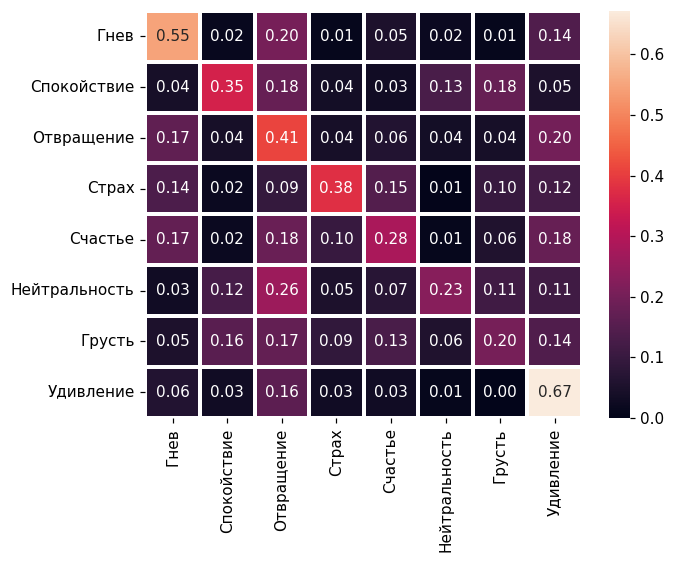

Saving confusion matrix with name:  Doc/figures/confusion_matrix.jpg


In [55]:
plotting_utils.plot_confusion_matrix(y_test, y_true, y_pred)